In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://128.198.162.191/pydev/dataFiles/HURRICANES/hurdat2-1851-2021.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12993 entries, 0 to 12992
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNIQUE_ID    12993 non-null  object 
 1   NAME         0 non-null      float64
 2   YEAR         12993 non-null  int64  
 3   MONTH        12993 non-null  int64  
 4   DAY          12993 non-null  int64  
 5   TIME         12993 non-null  int64  
 6   CLASS        12993 non-null  object 
 7   LAT          12993 non-null  object 
 8   LON          12993 non-null  object 
 9   WINDS        12993 non-null  int64  
 10  PRESSURE     12993 non-null  int64  
 11  34ktNE       12993 non-null  int64  
 12  34ktSE       12993 non-null  int64  
 13  34ktSW       12993 non-null  int64  
 14  34ktNW       12993 non-null  int64  
 15  50ktNE       12993 non-null  int64  
 16  50ktSE       12993 non-null  int64  
 17  50ktSW       12993 non-null  int64  
 18  50ktNW       12993 non-null  int64  
 19  64kt

In [34]:
df.head()

,UNIQUE_ID,NAME,YEAR,MONTH,DAY,TIME,CLASS,LAT,LON,WINDS,...,34ktNW,50ktNE,50ktSE,50ktSW,50ktNW,64ktNE,64ktSE,64ktSW,64ktNW,WIND_RADIUS
0,AL011851,NaN,1851,6,25,0,HU,28.0N,94.8W,80,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,NaN,1851,6,26,0,HU,28.2N,97.0W,70,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,NaN,1851,6,27,0,TS,29.0N,99.4W,50,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,NaN,1851,6,28,0,TS,31.0N,100.2W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL041851,NaN,1851,8,16,0,TS,13.4N,48.0W,40,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [35]:
hurricanes_by_year = df.groupby('YEAR')['UNIQUE_ID'].count().reset_index(name='COUNT')

hurricanes_by_year

,YEAR,COUNT
0,1851,24
1,1852,34
2,1853,25
3,1854,15
4,1855,9
...,...,...
166,2017,146
167,2018,148
168,2019,120
169,2020,214


# Plot the number of Hurricanes by Year

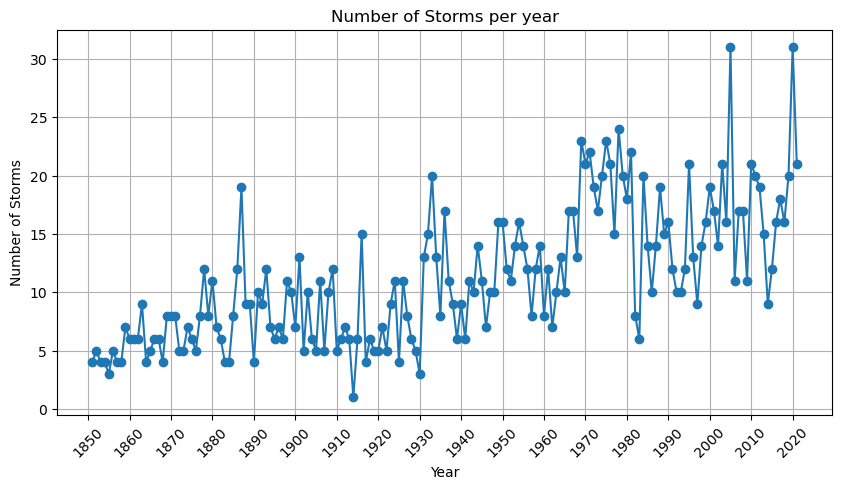

In [36]:
hurricanes_by_year = df.groupby('YEAR')['UNIQUE_ID'].nunique()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(hurricanes_by_year.index, hurricanes_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.title('Number of Storms per year')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

# Add an average line

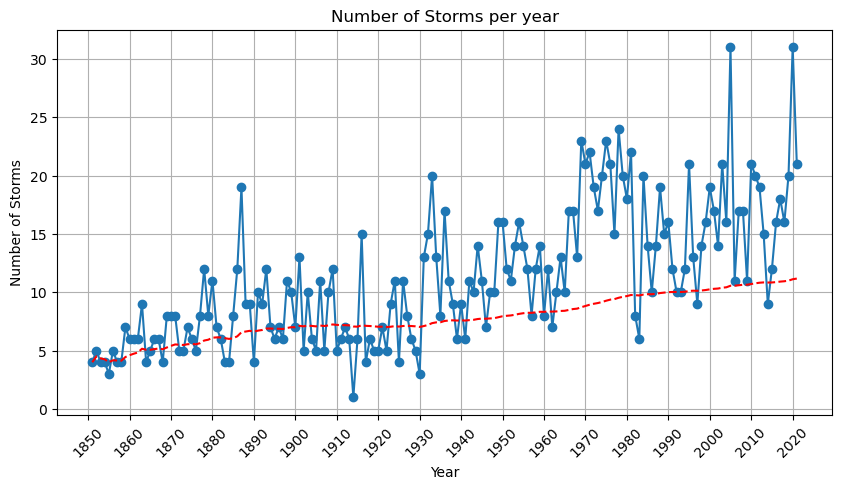

In [37]:
hurricanes_by_year = df.groupby('YEAR')['UNIQUE_ID'].nunique()

# Calculate the cumulative average of storms by year
cumulative_avg_hurricanes = hurricanes_by_year.expanding().mean()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(hurricanes_by_year.index, hurricanes_by_year.values, marker='o')

# Plot the average line
plt.plot(cumulative_avg_hurricanes.index, cumulative_avg_hurricanes.values, color='red', linestyle='--', label='Cumulative Average')

plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.title('Number of Storms per year')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

# Using a function to define hurricanes

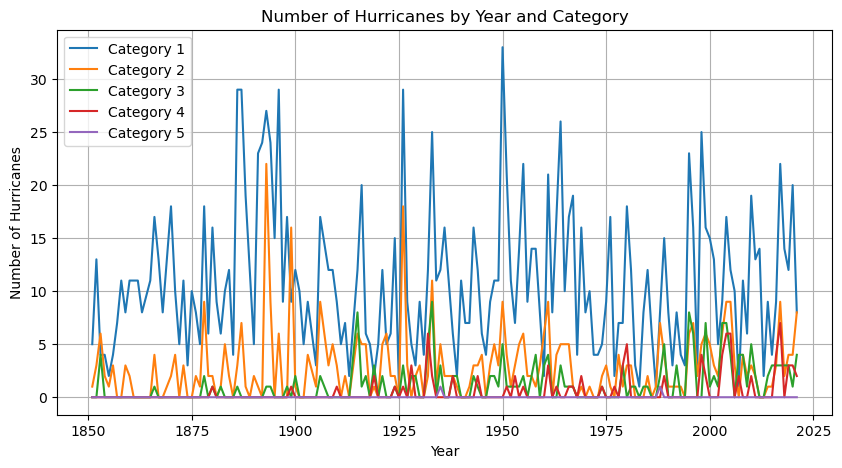

In [38]:
# Create a column in our dataframe with the hurricane classification based on wind speed

def category(speed):
    if 74 <= speed <= 95:
        return "Category 1"
    elif 96 <= speed <= 110:
        return "Category 2"
    elif 111 <= speed <= 129:
        return "Category 3"
    elif 130 <= speed <= 156:
        return "Category 4"
    elif speed >= 157:
        return "Category 5"

# This line creates a column in the dataframe called "CATEGORY" that is populated with the Category definition based on the 'category' function call.
df["CATEGORY"] = df["WINDS"].apply(category)

# We can filter by a year
# df = df[df['YEAR'] > 2000]

# Group the data by year and category, then count the number of hurricanes.
# .unstack(fill_values=o) will ensure that any years that have the number of hurricanes equal to zero will show zero instead of NaN.
hurricanes_by_year_category = df.groupby(["YEAR", "CATEGORY"])["UNIQUE_ID"].count().unstack(fill_value=0)

# Plot the results
plt.figure(figsize=(10,5))

# Loop through the dataframe to show all hurricane categories
for category in hurricanes_by_year_category.columns:
    plt.plot(hurricanes_by_year_category.index, hurricanes_by_year_category[category], label=category)
    
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes by Year and Category')
plt.grid()
plt.legend()
plt.show()

In [39]:
hurricanes_by_year_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 1851 to 2021
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Category 1  167 non-null    int64
 1   Category 2  167 non-null    int64
 2   Category 3  167 non-null    int64
 3   Category 4  167 non-null    int64
 4   Category 5  167 non-null    int64
dtypes: int64(5)
memory usage: 7.8 KB


## Vertical bar chart

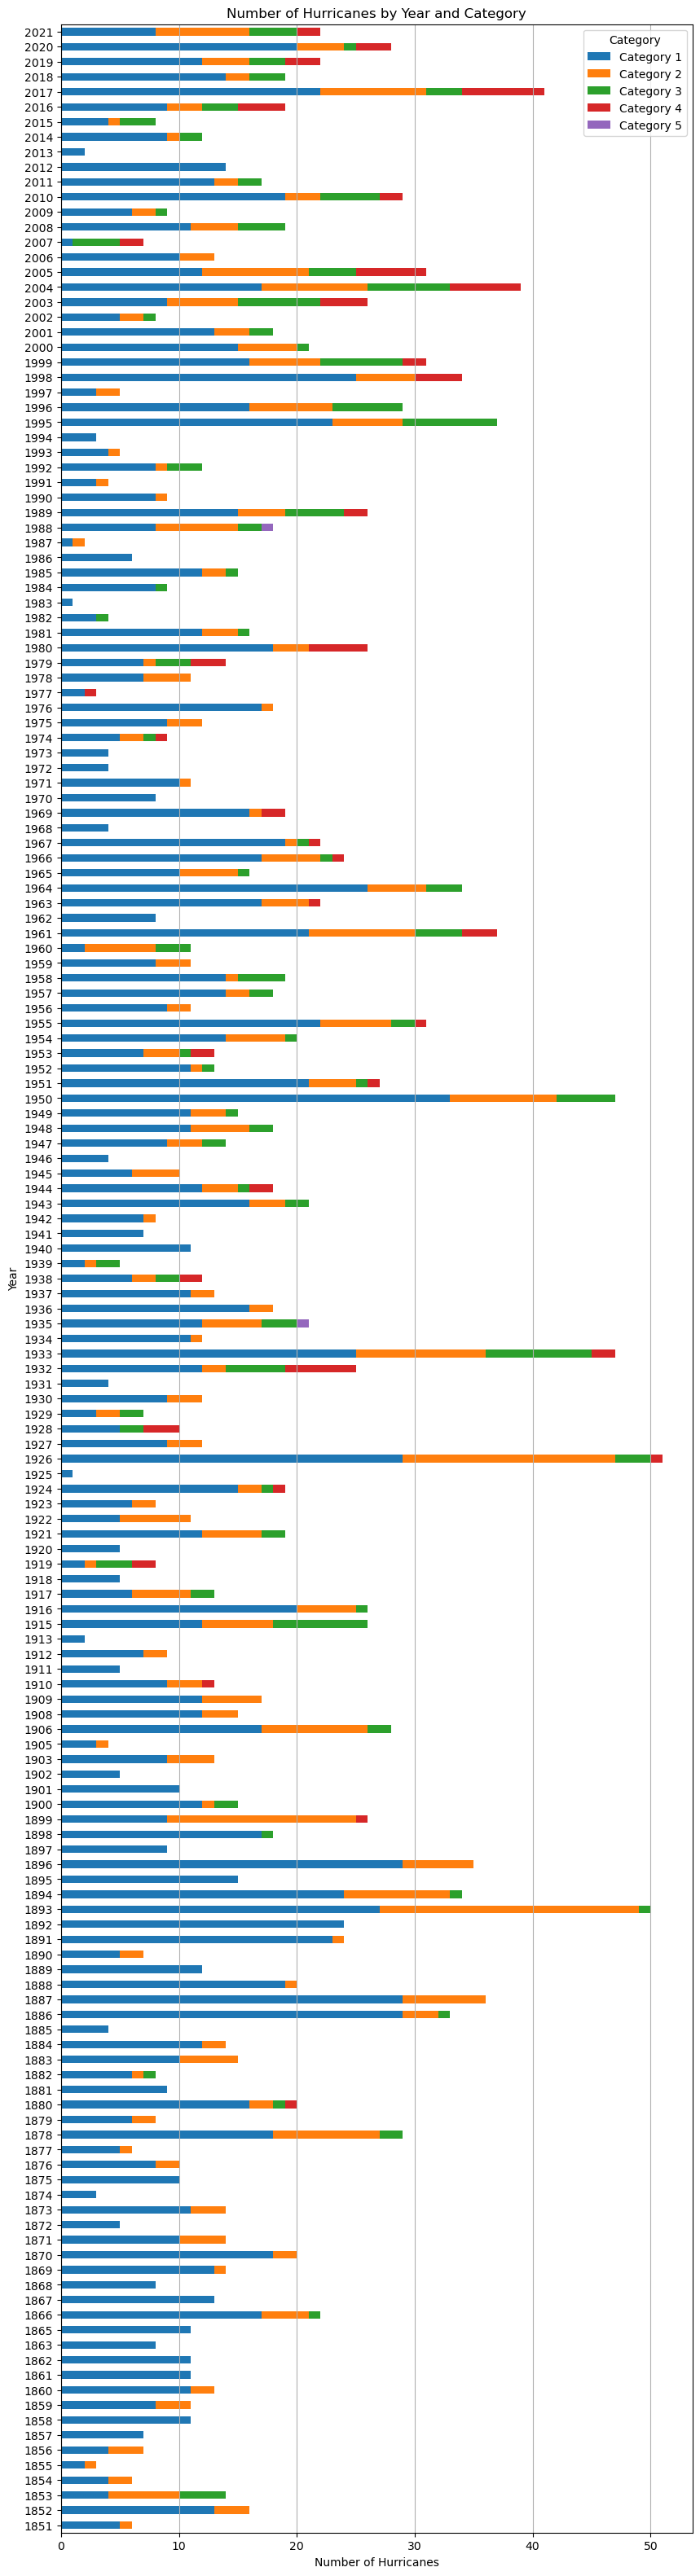

In [40]:
hurricanes_by_year_category = df.groupby(["YEAR", "CATEGORY"])["UNIQUE_ID"].count().unstack(fill_value=0)

# Plot the stacked bar chart
hurricanes_by_year_category.plot(kind="barh", stacked=True, figsize=(10,40))

# Plot the results
plt.ylabel('Year')
plt.xlabel('Number of Hurricanes')
plt.title('Number of Hurricanes by Year and Category')
plt.grid(axis='x')
plt.legend(title="Category")

plt.show()